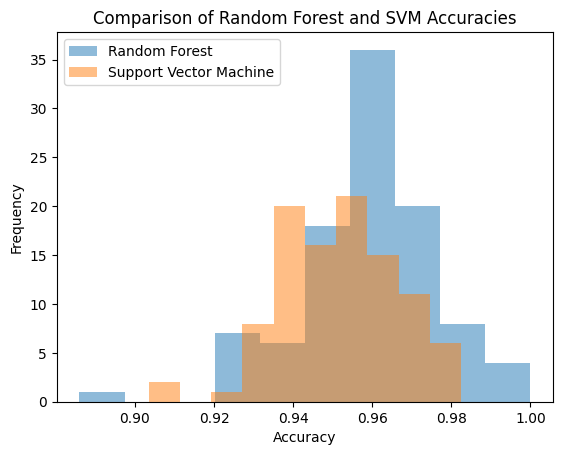

In [8]:
# use this code to insert any other model instead of random forest and support vector machine.
import pandas as pd
import urllib.request
import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# download data from internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
response = urllib.request.urlopen(url)
data = response.read()
text = io.StringIO(data.decode("utf-8"))

# load data into pandas dataframe
df = pd.read_csv(text, sep=",", header=None)

# create list of column names
cols = ["ID", "Diagnosis"]
for i in range(1, 31):
    cols.append("Feature " + str(i))

# assign column names to dataframe
df.columns = cols

# replace M (malignant) and B (benign) with 1 and 0, respectively
df["Diagnosis"] = pd.Series(df["Diagnosis"] == "M").astype(int)

# create empty lists to store accuracies
rfc_accuracies = []
svc_accuracies = []

# repeat experiment 100 times
num_iterations = 100
for i in range(num_iterations):
    # randomly split data into train and test sets
    df_train = df.sample(frac=0.8, random_state=i)
    df_test = df.drop(df_train.index)

    # extract features and labels for train and test sets
    X_train = df_train[cols[2:]]
    y_train = df_train["Diagnosis"]
    X_test = df_test[cols[2:]]
    y_test = df_test["Diagnosis"]

    # train random forest model
    rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=i)
    rfc_model.fit(X_train, y_train)

    # train support vector machine model
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # make predictions on test set and evaluate performance
    rfc_pred = rfc_model.predict(X_test)
    rfc_accuracy = accuracy_score(y_test, rfc_pred)
    svc_pred = svc_model.predict(X_test)
    svc_accuracy = accuracy_score(y_test, svc_pred)

    # append accuracies to lists
    rfc_accuracies.append(rfc_accuracy)
    svc_accuracies.append(svc_accuracy)

# plot histogram of accuracies
plt.hist(rfc_accuracies, alpha=0.5, label='Random Forest')
plt.hist(svc_accuracies, alpha=0.5, label='Support Vector Machine')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Comparison of Random Forest and SVM Accuracies')
plt.legend(loc='best')
plt.show()